# Lab 9b - 2-fold cross validation

We will finish Lab 9 in this notebook.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.model_selection import KFold


%matplotlib inline

In [2]:
# Load the Anscombe quartet data
anscombe = sns.load_dataset("anscombe")
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [3]:
# Separate out the Anscombe 3 data
anscombe_3 = anscombe[anscombe["dataset"] == "III"]
anscombe_3 = anscombe_3[["x","y"]]
anscombe_3

,x,y
22,10.0,7.46
23,8.0,6.77
24,13.0,12.74
25,9.0,7.11
26,11.0,7.81
27,14.0,8.84
28,6.0,6.08
29,4.0,5.39
30,12.0,8.15
31,7.0,6.42


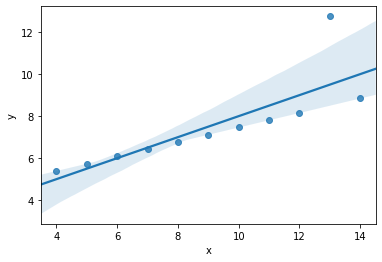

In [4]:
# Plot Anscombe 3
sns.regplot(x = "x", y = "y", data = anscombe_3)

In [5]:
# Split the data in half into fold 1 and fold 2
X_fold1, X_fold2, y_fold1, y_fold2 = train_test_split(anscombe_3[["x"]], anscombe_3["y"], test_size=0.5)

In [6]:
X_fold1

,x
30,12.0
22,10.0
31,7.0
28,6.0
32,5.0


Use the fold 1 data to fit the linear model using the sci-kit learn version:

In [9]:
lm_fold1 = linear_model.LinearRegression()
lm_fold1.fit(X_fold1, y_fold1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Use this linear model to make predictions for the fold 2 data:

In [10]:
fold2_predictions = lm_fold1.predict(X_fold2)

Compute the mean squared error for the fold 2 predictions:

In [11]:
((y_fold2 - fold2_predictions)**2).mean()

3.002016811418686

Now let's do the reverse.  Use the fold2 data to create the linear model:

In [12]:
lm_fold2 = linear_model.LinearRegression()
lm_fold2.fit(X_fold2, y_fold2) #

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Use this linear model to make predictions for the fold 1 data:

In [13]:
fold1_preditctions = lm_fold2.predict(X_fold1)

Compute the mean squared error for the fold 1 predictions:

In [15]:
((y_fold1 - fold1_preditctions)**2).mean()

0.3898260237187569

How do the two mean squared errors compare?  What might be happening here?

To better understand whaat's happening, let's plot the two training data sets using `regplot()` in Seaborn.  

First plot the fold 1 data, where x is `X_fold1["x"]` and y is `y_fold1`.

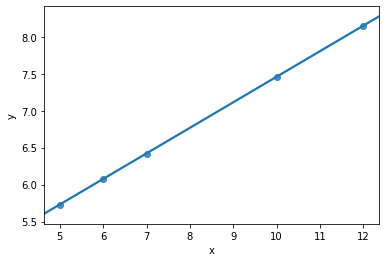

In [18]:
sns.regplot(x=X_fold1['x'], y=y_fold1)

Next plot the fold 2 data, where x is `X_fold2["x"]` and y is `y_fold2`.

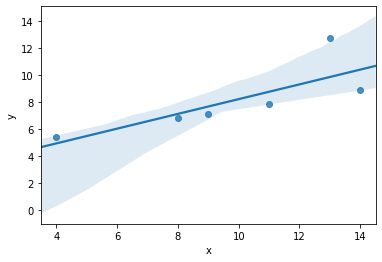

In [19]:
sns.regplot(x=X_fold2['x'], y=y_fold2)